# Usage Patterns of Ford GoBike service in San Franciso

## Investigation Overview

In this Investigation, I wanted to look at how usage patterns vary across user types of Subscribers and Customers.

## Dataset Overview

The data consisted of information about bike share trips taken from July 2017 to June 2018. The information contains user type , ride duration, ride start and end station details etc. Approximately 5% data points were removed from the analysis due to inconsistencies or missing information.

Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

## Gathering Data

We are gathering Bike Share data from July 2017 to June 2018

Loading Bike Share csv data

In [2]:
df_bike_share = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
for i in range(1,7):
    file_name = '20180' + str(i) + '-fordgobike-tripdata.csv'
    df_new = pd.read_csv(file_name)
    df_bike_share = pd.concat([df_bike_share, df_new],
                             ignore_index=True)

In [4]:
df_bike_share.tail()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
1338859,3848,No,491,113.0,37.764555,-122.410345,Franklin Square,2018-06-01 00:11:24.1070,1965.0,Male,41.0,37.781270,-122.418740,Golden Gate Ave at Polk St,2018-06-01 00:03:12.2280,Subscriber
1338860,4036,No,507,141.0,37.747998,-122.420219,Valencia St at Cesar Chavez St,2018-06-01 00:10:55.6850,1972.0,Male,118.0,37.759177,-122.436943,Eureka Valley Recreation Center,2018-06-01 00:02:28.3230,Subscriber
1338861,1242,No,377,195.0,37.812314,-122.260779,Bay Pl at Vernon St,2018-06-01 00:10:27.6620,1976.0,Male,186.0,37.801319,-122.262642,Lakeside Dr at 14th St,2018-06-01 00:04:10.0830,Subscriber
1338862,3800,No,391,27.0,37.788059,-122.391865,Beale St at Harrison St,2018-06-01 00:10:08.9190,1976.0,Male,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2018-06-01 00:03:37.7150,Subscriber
1338863,1607,No,283,81.0,37.775880,-122.393170,Berry St at 4th St,2018-06-01 00:07:21.1330,1987.0,Male,36.0,37.783830,-122.398870,Folsom St at 3rd St,2018-06-01 00:02:37.3310,Subscriber


In [5]:
df_bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338864 entries, 0 to 1338863
Data columns (total 16 columns):
bike_id                    1338864 non-null int64
bike_share_for_all_trip    819164 non-null object
duration_sec               1338864 non-null int64
end_station_id             1336803 non-null float64
end_station_latitude       1338864 non-null float64
end_station_longitude      1338864 non-null float64
end_station_name           1336803 non-null object
end_time                   1338864 non-null object
member_birth_year          1213626 non-null float64
member_gender              1213928 non-null object
start_station_id           1336803 non-null float64
start_station_latitude     1338864 non-null float64
start_station_longitude    1338864 non-null float64
start_station_name         1336803 non-null object
start_time                 1338864 non-null object
user_type                  1338864 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 163.4+ MB


## Assessing Data

Inspecting the dataset for quality and tidyness issues

In [6]:
df_bike_share.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,Customer
1,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,Customer
2,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.8830,NaN,NaN,245.0,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.4110,Customer
3,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.5310,NaN,NaN,60.0,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.6360,Customer
4,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,Subscriber


In [7]:
df_bike_share.columns

Index(['bike_id', 'bike_share_for_all_trip', 'duration_sec', 'end_station_id',
       'end_station_latitude', 'end_station_longitude', 'end_station_name',
       'end_time', 'member_birth_year', 'member_gender', 'start_station_id',
       'start_station_latitude', 'start_station_longitude',
       'start_station_name', 'start_time', 'user_type'],
      dtype='object')

In [8]:
df_bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338864 entries, 0 to 1338863
Data columns (total 16 columns):
bike_id                    1338864 non-null int64
bike_share_for_all_trip    819164 non-null object
duration_sec               1338864 non-null int64
end_station_id             1336803 non-null float64
end_station_latitude       1338864 non-null float64
end_station_longitude      1338864 non-null float64
end_station_name           1336803 non-null object
end_time                   1338864 non-null object
member_birth_year          1213626 non-null float64
member_gender              1213928 non-null object
start_station_id           1336803 non-null float64
start_station_latitude     1338864 non-null float64
start_station_longitude    1338864 non-null float64
start_station_name         1336803 non-null object
start_time                 1338864 non-null object
user_type                  1338864 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 163.4+ MB


In [9]:
df_bike_share['user_type'].value_counts()

Subscriber    1101580
Customer       237284
Name: user_type, dtype: int64

In [10]:
df_bike_share['member_gender'].value_counts()

Male      908002
Female    288008
Other      17918
Name: member_gender, dtype: int64

In [11]:
df_bike_share.describe()

,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,start_station_id,start_station_latitude,start_station_longitude
count,1.338864e+06,1.338864e+06,1.336803e+06,1.338864e+06,1.338864e+06,1.213626e+06,1.336803e+06,1.338864e+06,1.338864e+06
mean,1.987671e+03,9.647702e+02,1.038589e+02,3.776922e+01,-1.223558e+02,1.981468e+03,1.060832e+02,3.776906e+01,-1.223565e+02
std,1.137599e+03,2.945693e+03,9.142859e+01,9.678806e-02,1.557933e-01,1.056388e+01,9.194348e+01,9.689138e-02,1.561779e-01
min,1.000000e+01,6.100000e+01,3.000000e+00,3.731285e+01,-1.224443e+02,1.886000e+03,3.000000e+00,3.731285e+01,-1.224443e+02
25%,1.025000e+03,3.620000e+02,2.700000e+01,3.777331e+01,-1.224107e+02,1.976000e+03,2.800000e+01,3.777241e+01,-1.224117e+02
50%,2.043000e+03,5.700000e+02,7.500000e+01,3.778240e+01,-1.223974e+02,1.984000e+03,7.800000e+01,3.778175e+01,-1.223985e+02
75%,2.907000e+03,8.950000e+02,1.630000e+02,3.779539e+01,-1.223903e+02,1.989000e+03,1.670000e+02,3.779539e+01,-1.223898e+02
max,4.307000e+03,8.636900e+04,3.560000e+02,4.551000e+01,-7.357000e+01,2.000000e+03,3.560000e+02,4.551000e+01,-7.357000e+01


In [12]:
df_bike_share['duration_sec'].quantile(0.95)

1952.0

In [13]:
df_test =  df_bike_share[df_bike_share['duration_sec'] >  df_bike_share['duration_sec'].quantile(0.95)]
df_test.shape

(66939, 16)

In [14]:
df_bike_share.duplicated().sum()

0

### Quality Issues

* duration_sec field is of type float instead of int
* start_time and end_time fields are of type object instead of timestamp
* start_station_id and end_station_id fields are of type int instead of string
* bike_id field is of type int instead of string
* user_type field is of type object instead of category
* member_birth_year field is of type float instead of int
* member_gender field is of type object instead of category
* missing data in member_birth_year and member_gender fields



## Cleaning Data

Taking a copy of dataframe and performing cleaning operations on them

In [15]:
df_bike_share_copy = df_bike_share.copy(deep=False)

In [16]:
df_bike_share_copy.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,Customer
1,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,Customer
2,1094,NaN,45768,245.0,37.870348,-122.267764,Downtown Berkeley BART,2018-01-01 11:28:36.8830,NaN,NaN,245.0,37.870348,-122.267764,Downtown Berkeley BART,2017-12-31 22:45:48.4110,Customer
3,2831,NaN,62172,5.0,37.783899,-122.408445,Powell St BART Station (Market St at 5th St),2018-01-01 10:47:23.5310,NaN,NaN,60.0,37.774520,-122.409449,8th St at Ringold St,2017-12-31 17:31:10.6360,Customer
4,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,Subscriber


### Define

Drop rows with missing data in member_birth_year and member_gender and reset the index

### Code

In [17]:
df_bike_share_copy = df_bike_share_copy.dropna(axis=0, subset=['member_birth_year'])

In [18]:
df_bike_share_copy.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,Customer
1,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,Customer
4,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,Subscriber
6,3539,NaN,4507,259.0,37.866249,-122.299371,Addison St at Fourth St,2018-01-01 01:04:35.6190,1991.0,Female,259.0,37.866249,-122.299371,Addison St at Fourth St,2017-12-31 23:49:28.4220,Customer
12,2311,NaN,2183,24.0,37.789677,-122.390428,Spear St at Folsom St,2018-01-01 00:29:18.7430,1990.0,Male,67.0,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2017-12-31 23:52:55.5810,Subscriber


In [19]:
df_bike_share_copy.reset_index(inplace=True, drop=True)

In [20]:
df_bike_share_copy.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.2450,1987.0,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.6540,Customer
1,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.6170,1965.0,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.8420,Customer
2,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.5710,1997.0,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.0010,Subscriber
3,3539,NaN,4507,259.0,37.866249,-122.299371,Addison St at Fourth St,2018-01-01 01:04:35.6190,1991.0,Female,259.0,37.866249,-122.299371,Addison St at Fourth St,2017-12-31 23:49:28.4220,Customer
4,2311,NaN,2183,24.0,37.789677,-122.390428,Spear St at Folsom St,2018-01-01 00:29:18.7430,1990.0,Male,67.0,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2017-12-31 23:52:55.5810,Subscriber


### Test

In [21]:
df_bike_share_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213626 entries, 0 to 1213625
Data columns (total 16 columns):
bike_id                    1213626 non-null int64
bike_share_for_all_trip    760467 non-null object
duration_sec               1213626 non-null int64
end_station_id             1211667 non-null float64
end_station_latitude       1213626 non-null float64
end_station_longitude      1213626 non-null float64
end_station_name           1211667 non-null object
end_time                   1213626 non-null object
member_birth_year          1213626 non-null float64
member_gender              1213626 non-null object
start_station_id           1211667 non-null float64
start_station_latitude     1213626 non-null float64
start_station_longitude    1213626 non-null float64
start_station_name         1211667 non-null object
start_time                 1213626 non-null object
user_type                  1213626 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 148.1+ MB


In [22]:
df_bike_share_copy.tail()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
1213621,3848,No,491,113.0,37.764555,-122.410345,Franklin Square,2018-06-01 00:11:24.1070,1965.0,Male,41.0,37.781270,-122.418740,Golden Gate Ave at Polk St,2018-06-01 00:03:12.2280,Subscriber
1213622,4036,No,507,141.0,37.747998,-122.420219,Valencia St at Cesar Chavez St,2018-06-01 00:10:55.6850,1972.0,Male,118.0,37.759177,-122.436943,Eureka Valley Recreation Center,2018-06-01 00:02:28.3230,Subscriber
1213623,1242,No,377,195.0,37.812314,-122.260779,Bay Pl at Vernon St,2018-06-01 00:10:27.6620,1976.0,Male,186.0,37.801319,-122.262642,Lakeside Dr at 14th St,2018-06-01 00:04:10.0830,Subscriber
1213624,3800,No,391,27.0,37.788059,-122.391865,Beale St at Harrison St,2018-06-01 00:10:08.9190,1976.0,Male,30.0,37.776598,-122.395282,San Francisco Caltrain (Townsend St at 4th St),2018-06-01 00:03:37.7150,Subscriber
1213625,1607,No,283,81.0,37.775880,-122.393170,Berry St at 4th St,2018-06-01 00:07:21.1330,1987.0,Male,36.0,37.783830,-122.398870,Folsom St at 3rd St,2018-06-01 00:02:37.3310,Subscriber


### Define

Use astype() to convert fields to types int and category. Used pandas to_datetime() to convert fields to timestamp

### Code

In [23]:
df_bike_share_copy['duration_sec'] = df_bike_share_copy['duration_sec'].astype(int)
df_bike_share_copy['member_birth_year'] = df_bike_share_copy['member_birth_year'].astype(int)
df_bike_share_copy['bike_id'] = df_bike_share_copy['bike_id'].astype(str)
df_bike_share_copy['start_station_id'] = df_bike_share_copy['start_station_id'].astype(str)
df_bike_share_copy['end_station_id'] = df_bike_share_copy['end_station_id'].astype(str)
df_bike_share_copy['start_time'] = pd.to_datetime(df_bike_share_copy['start_time'])
df_bike_share_copy['end_time'] = pd.to_datetime(df_bike_share_copy['end_time'])
df_bike_share_copy['user_type'] = df_bike_share_copy['user_type'].astype('category')
df_bike_share_copy['member_gender'] = df_bike_share_copy['member_gender'].astype('category')

### Test

In [24]:
df_bike_share_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213626 entries, 0 to 1213625
Data columns (total 16 columns):
bike_id                    1213626 non-null object
bike_share_for_all_trip    760467 non-null object
duration_sec               1213626 non-null int64
end_station_id             1213626 non-null object
end_station_latitude       1213626 non-null float64
end_station_longitude      1213626 non-null float64
end_station_name           1211667 non-null object
end_time                   1213626 non-null datetime64[ns]
member_birth_year          1213626 non-null int64
member_gender              1213626 non-null category
start_station_id           1213626 non-null object
start_station_latitude     1213626 non-null float64
start_station_longitude    1213626 non-null float64
start_station_name         1211667 non-null object
start_time                 1213626 non-null datetime64[ns]
user_type                  1213626 non-null category
dtypes: category(2), datetime64[ns](2), float64(4)

## Exploratory Analysis

In [25]:
df_bike_share_copy.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.245,1987,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.654,Customer
1,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.617,1965,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.842,Customer
2,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.571,1997,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.001,Subscriber
3,3539,NaN,4507,259.0,37.866249,-122.299371,Addison St at Fourth St,2018-01-01 01:04:35.619,1991,Female,259.0,37.866249,-122.299371,Addison St at Fourth St,2017-12-31 23:49:28.422,Customer
4,2311,NaN,2183,24.0,37.789677,-122.390428,Spear St at Folsom St,2018-01-01 00:29:18.743,1990,Male,67.0,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2017-12-31 23:52:55.581,Subscriber


Creating a new column duration_min for analysis

In [26]:
df_bike_share_copy['duration_min'] = np.round(df_bike_share_copy['duration_sec']/60).astype(int)

In [27]:
df_bike_share_copy.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,duration_min
0,96,NaN,80110,43.0,37.778768,-122.415929,San Francisco Public Library (Grove St at Hyde...,2018-01-01 15:12:50.245,1987,Male,74.0,37.776435,-122.426244,Laguna St at Hayes St,2017-12-31 16:57:39.654,Customer,1335
1,88,NaN,78800,96.0,37.766210,-122.426614,Dolores St at 15th St,2018-01-01 13:49:55.617,1965,Female,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2017-12-31 15:56:34.842,Customer,1313
2,3167,NaN,43603,247.0,37.867789,-122.265896,Fulton St at Bancroft Way,2018-01-01 02:29:57.571,1997,Female,239.0,37.868813,-122.258764,Bancroft Way at Telegraph Ave,2017-12-31 14:23:14.001,Subscriber,727
3,3539,NaN,4507,259.0,37.866249,-122.299371,Addison St at Fourth St,2018-01-01 01:04:35.619,1991,Female,259.0,37.866249,-122.299371,Addison St at Fourth St,2017-12-31 23:49:28.422,Customer,75
4,2311,NaN,2183,24.0,37.789677,-122.390428,Spear St at Folsom St,2018-01-01 00:29:18.743,1990,Male,67.0,37.776639,-122.395526,San Francisco Caltrain Station 2 (Townsend St...,2017-12-31 23:52:55.581,Subscriber,36


since we have the start and end station id's we dont require the station name, and location coordinates. Hence we can drop those columns

In [28]:
df_bike_share_copy.drop(['start_station_name','start_station_latitude', 'start_station_longitude','end_station_name','end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

In [29]:
df_bike_share_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213626 entries, 0 to 1213625
Data columns (total 11 columns):
bike_id                    1213626 non-null object
bike_share_for_all_trip    760467 non-null object
duration_sec               1213626 non-null int64
end_station_id             1213626 non-null object
end_time                   1213626 non-null datetime64[ns]
member_birth_year          1213626 non-null int64
member_gender              1213626 non-null category
start_station_id           1213626 non-null object
start_time                 1213626 non-null datetime64[ns]
user_type                  1213626 non-null category
duration_min               1213626 non-null int64
dtypes: category(2), datetime64[ns](2), int64(3), object(4)
memory usage: 85.6+ MB


### Bike Share for all Users

bike_share_for_all_trip is is available to Bay Area residents ages 18 and older who qualify for Calfresh, SFMTA (Low Income) Lifeline Passes or PG&E CARE utility discount.

In [30]:
df_bike_share_copy['bike_share_for_all_trip'].value_counts()

No     691062
Yes     69405
Name: bike_share_for_all_trip, dtype: int64

In [31]:
df_bike_share_copy[df_bike_share_copy['bike_share_for_all_trip'] == 'Yes']['user_type'].value_counts()

Subscriber    69405
Customer          0
Name: user_type, dtype: int64

Looks like Users of Bike share for all program are grouped under 'Subscribers'

'Bike Share for all Users Membership' includes first 60 minutes of each trip. Exploring Trip Duration of such users

In [32]:
df_bike_share_copy[df_bike_share_copy['bike_share_for_all_trip'] == 'Yes']['duration_min'].sort_values(ascending=False)

741095     1436
786607     1418
640603     1413
823563     1335
512202     1328
940337     1318
874194     1282
1039599    1278
1061396    1265
965503     1241
602075     1211
625115     1207
478124     1164
815281     1127
574722     1119
1186539    1107
1142341    1097
1014372    1033
681292      989
734244      987
1030262     985
806746      981
1047845     980
551684      943
760222      933
1079901     929
1115314     900
991073      888
633395      872
1201981     855
           ... 
1155359       1
1155344       1
713665        1
542310        1
542496        1
1045961       1
1031040       1
676859        1
542937        1
712941        1
677275        1
596360        1
803141        1
713909        1
541950        1
774386        1
675827        1
675816        1
675702        1
541875        1
598924        1
714466        1
541631        1
843223        1
714594        1
599304        1
466395        1
674986        1
1177608       1
1148464       1
Name: duration_min, Leng

The Ride Duration of bike share for all Users runs into 1000+ min costing such users as much as $275. It is to be noted that these users belong to low income group. Since we are not sure about the accuracy of the data of these users, we are dropping bike share for all Users

In [33]:
df_bike_share_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213626 entries, 0 to 1213625
Data columns (total 11 columns):
bike_id                    1213626 non-null object
bike_share_for_all_trip    760467 non-null object
duration_sec               1213626 non-null int64
end_station_id             1213626 non-null object
end_time                   1213626 non-null datetime64[ns]
member_birth_year          1213626 non-null int64
member_gender              1213626 non-null category
start_station_id           1213626 non-null object
start_time                 1213626 non-null datetime64[ns]
user_type                  1213626 non-null category
duration_min               1213626 non-null int64
dtypes: category(2), datetime64[ns](2), int64(3), object(4)
memory usage: 85.6+ MB


In [34]:
df_bike_share_copy = df_bike_share_copy[df_bike_share_copy['bike_share_for_all_trip'] != 'Yes']

In [35]:
df_bike_share_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144221 entries, 0 to 1213625
Data columns (total 11 columns):
bike_id                    1144221 non-null object
bike_share_for_all_trip    691062 non-null object
duration_sec               1144221 non-null int64
end_station_id             1144221 non-null object
end_time                   1144221 non-null datetime64[ns]
member_birth_year          1144221 non-null int64
member_gender              1144221 non-null category
start_station_id           1144221 non-null object
start_time                 1144221 non-null datetime64[ns]
user_type                  1144221 non-null category
duration_min               1144221 non-null int64
dtypes: category(2), datetime64[ns](2), int64(3), object(4)
memory usage: 89.5+ MB


In [36]:
df_bike_share_copy.drop(['bike_share_for_all_trip'], axis=1, inplace=True)

In [37]:
df_bike_share_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144221 entries, 0 to 1213625
Data columns (total 10 columns):
bike_id              1144221 non-null object
duration_sec         1144221 non-null int64
end_station_id       1144221 non-null object
end_time             1144221 non-null datetime64[ns]
member_birth_year    1144221 non-null int64
member_gender        1144221 non-null category
start_station_id     1144221 non-null object
start_time           1144221 non-null datetime64[ns]
user_type            1144221 non-null category
duration_min         1144221 non-null int64
dtypes: category(2), datetime64[ns](2), int64(3), object(3)
memory usage: 80.8+ MB


### Univariate Exploration

In [38]:
def plot_label(title, xlabel, ylabel):
    plt.title(title)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.show()

### Ride Duration

Distribution of ride duration in minutes

In [39]:
df_bike_share_copy['duration_min'].max()

1438

In [40]:
df_bike_share_copy['duration_min'].quantile(0.99)

67.0

In [41]:
df_bike_share_copy.loc[:,"duration_min"].mode()[0]

6

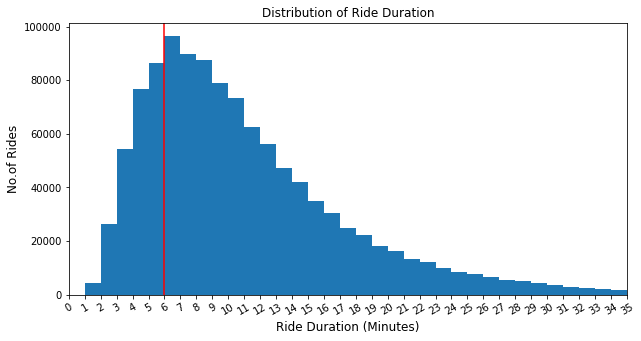

In [42]:
plt.figure(figsize=(10,5))
bin_edges = np.arange(0,80,1)
plt.hist(data=df_bike_share_copy, x='duration_min', bins=bin_edges);
plt.xlim(0,35)
tick_xlocs = np.arange(0,36,1)
plt.xticks(tick_xlocs, tick_xlocs, rotation=30);
plt.axvline(df_bike_share_copy.loc[:,"duration_min"].mode()[0], color='red')
plot_label('Distribution of Ride Duration', 'Ride Duration (Minutes)', 'No.of Rides')

Appears like the largest number of bike rides lasted between 6-7 min

In [43]:
user_type = df_bike_share_copy['user_type'].value_counts()

### User Types

There are two types of users who use Ford GoBikes.
* Subscribers - Users who have subscribed to the service. As a part of the subscription, they can use the bikes for unlimited number of 45 min rides. After the ride limit of 45 min, an extra 3\\$ is charged for every 15 min of the ride. Approximately 88% of rides in dataset were by Subscribers.
* Customers - Casual or one off rides of 30 min costing 3\\$. After the ride limit of 30 min, an extra 3\\$ is charged for every 15 min of the ride. Approximately 12% of rides in dataset were by Customers.


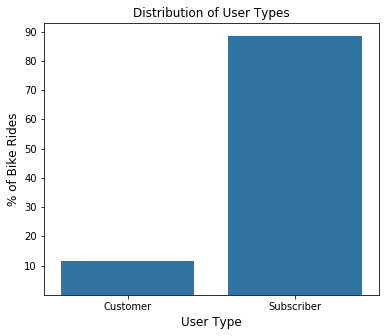

In [44]:
plt.figure(figsize=(6,5))
base_color = sb.color_palette()[0]
sb.barplot(user_type.index, user_type.values/user_type.values.sum(), color = base_color)
tick_ylocs = np.arange(10, 100, 10)
plt.yticks(tick_ylocs/100, tick_ylocs)
plot_label('Distribution of User Types', 'User Type', '% of Bike Rides')

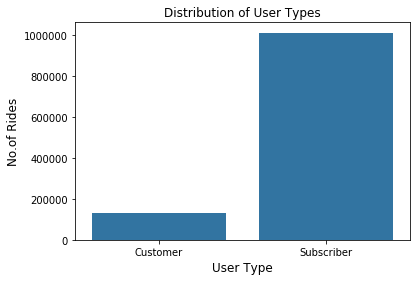

In [45]:
sb.barplot(user_type.index, user_type.values,color = base_color)
plot_label('Distribution of User Types', 'User Type', 'No.of Rides')

Looks like bike rides by subscribers are significantly much higher than those by non subscribers

### Member Gender

In [46]:
member_gender = df_bike_share_copy['member_gender'].value_counts()

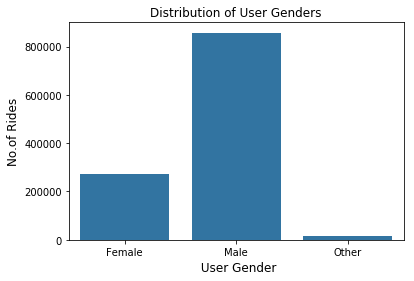

In [47]:
sb.barplot(member_gender.index, member_gender.values,color = base_color)
plot_label('Distribution of User Genders', ' User Gender', 'No.of Rides')

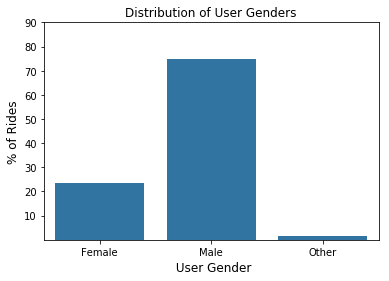

In [48]:
sb.barplot(member_gender.index, member_gender.values/member_gender.values.sum(), color = base_color)
tick_ylocs = np.arange(10, 100, 10)
plt.yticks(tick_ylocs/100, tick_ylocs)
plot_label('Distribution of User Genders', ' User Gender', '% of Rides')

Looks like the Males used the bike share services much more than Females and other gender

### Age Demographic

In [49]:
df_bike_share_copy['age'] = 2017 - df_bike_share_copy['member_birth_year']

In [50]:
df_bike_share_copy['age'].describe()

count    1.144221e+06
mean     3.558632e+01
std      1.030888e+01
min      1.700000e+01
25%      2.800000e+01
50%      3.300000e+01
75%      4.100000e+01
max      1.310000e+02
Name: age, dtype: float64

In [51]:
df_bike_share_copy[df_bike_share_copy['age'] >= 100 ].shape

(838, 11)

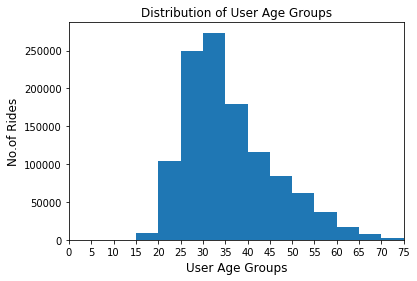

In [52]:
bin_edges = np.arange(0,90,5)
plt.hist(data=df_bike_share_copy, x='age', bins=bin_edges);
plt.xticks(bin_edges, bin_edges);
plt.xlim(0,75)
plot_label('Distribution of User Age Groups', 'User Age Groups', 'No.of Rides')

The 25 - 35 age group seem to take the most number of  bike rides

### Number of bike rides per month

In [53]:
month_order = [7, 8, 9,10,11,12,1,2,3,4,5,6]
month_index = df_bike_share_copy.groupby(df_bike_share_copy['start_time'].dt.month)['start_time'].count().index
month_values = df_bike_share_copy.groupby(df_bike_share_copy['start_time'].dt.month)['start_time'].count().values

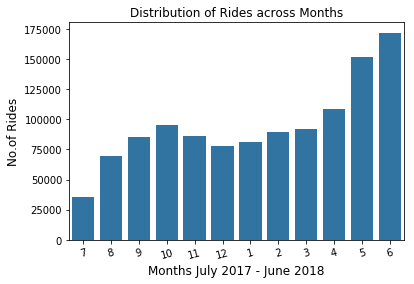

In [54]:
base_color = sb.color_palette()[0]
sb.barplot(month_index, month_values, order=month_order, color = base_color)
plt.xticks(rotation=15);
plot_label('Distribution of Rides across Months', 'Months July 2017 - June 2018', 'No.of Rides')

Looks like there is a dip in number of rides near Nov 2017 and a steady rise in numbers ever since ino 2018


### Number of bike rides per day

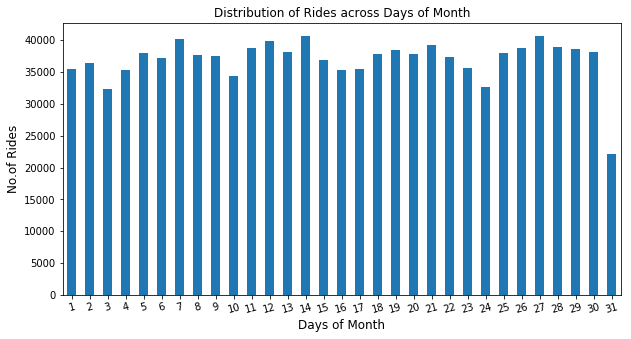

In [55]:
plt.figure(figsize=(10,5))
df_bike_share_copy.groupby(df_bike_share_copy['start_time'].dt.day)['start_time'].count().plot(kind='bar');
plt.xticks(rotation=15)
plot_label('Distribution of Rides across Days of Month', 'Days of Month', 'No.of Rides')

These seem to be multiple peaks across days of month

### Number of bikerides per day of week

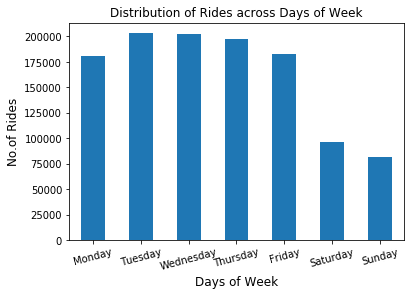

In [56]:
df_bike_share_copy.groupby(df_bike_share_copy['start_time'].dt.dayofweek)['start_time'].count().plot(kind='bar');
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks([0,1,2,3,4,5,6], week_order, rotation=15);
plot_label('Distribution of Rides across Days of Week', 'Days of Week', 'No.of Rides')

Maximum rides seem to occur in mid of the week suggesting people use bike share to commute to work on weekdays, while minimum rides occur at weekends

### Number of bike rides across hours of a day

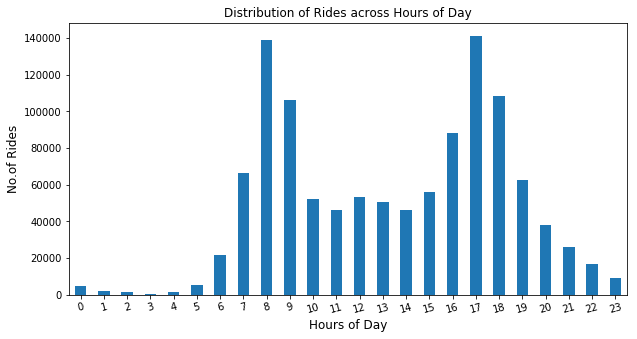

In [57]:
plt.figure(figsize=(10,5))
df_bike_share_copy.groupby(df_bike_share_copy['start_time'].dt.hour)['start_time'].count().plot(kind='bar');
plt.xticks(rotation=15)
plot_label('Distribution of Rides across Hours of Day', 'Hours of Day', 'No.of Rides')

Looks like the majority of bike rides occur between 8 to 10 hrs in the morning and 17 to 19 hours in the evening suggesting people using bike share to commute to/fro work

### Bivariate Exploration

In [58]:
def subplot_label(ax, title, x_label, y_label):
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    

Forming user groups

In [59]:
df_bike_share_copy_customer = df_bike_share_copy[df_bike_share_copy['user_type'] == 'Customer']
df_bike_share_copy_subscriber = df_bike_share_copy[df_bike_share_copy['user_type'] == 'Subscriber']
df_bike_share_copy_male = df_bike_share_copy[df_bike_share_copy['member_gender'] == 'Male']
df_bike_share_copy_female = df_bike_share_copy[df_bike_share_copy['member_gender'] == 'Female']
df_bike_share_copy_other = df_bike_share_copy[df_bike_share_copy['member_gender'] == 'Other']

### Ride duration across user base

On analysing the distribution of ride duration, 10-11 min duration had the highest frequency of Customer rides while 6-7 min duration had the highest frequency of Subscriber rides.


(0, 50)

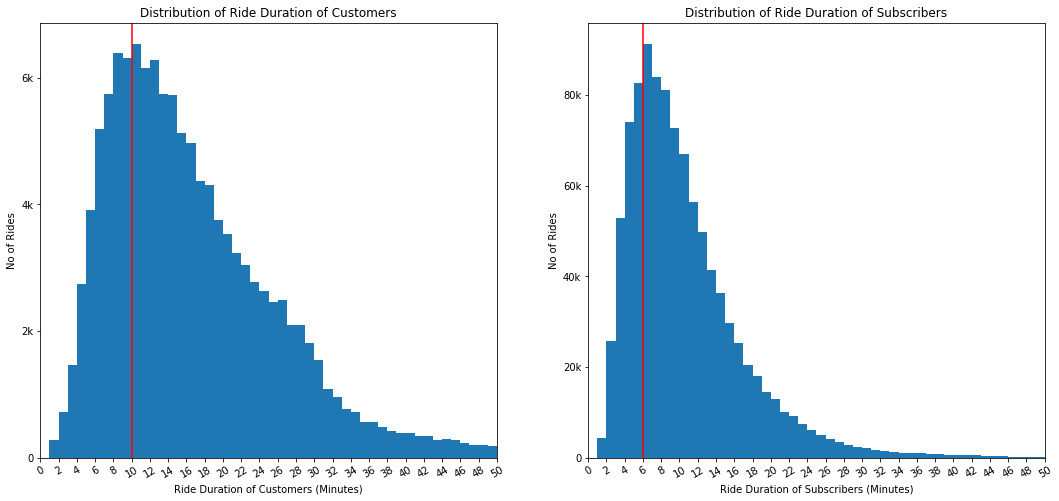

In [60]:
plt.figure(figsize=(18,8))

ax1 = plt.subplot(1, 2, 1)
bin_edges = np.arange(0,80,1)
plt.hist(data=df_bike_share_copy_customer, x='duration_min', bins=bin_edges);
tick_xlocs = np.arange(0,52,2)
tick_ylocs = np.arange(0,8000,2000)
tick_ylocs_label = ['0', '2k', '4k', '6k', '8k']
plt.xticks(tick_xlocs, tick_xlocs, rotation=30);
plt.yticks(tick_ylocs, tick_ylocs_label);
plt.axvline(df_bike_share_copy_customer.loc[:,"duration_min"].mode()[0], color='red')
subplot_label(ax1,'Distribution of Ride Duration of Customers', 'Ride Duration of Customers (Minutes)','No of Rides')
plt.xlim(0,50)

ax2 = plt.subplot(1, 2, 2)
bin_edges = np.arange(0,80,1)
plt.hist(data=df_bike_share_copy_subscriber, x='duration_min', bins=bin_edges);
tick_xlocs = np.arange(0,52,2)
tick_ylocs = np.arange(0,100000,20000)
tick_ylocs_label = ['0', '20k', '40k', '60k', '80k']
plt.xticks(tick_xlocs, tick_xlocs, rotation=30);
plt.yticks(tick_ylocs, tick_ylocs_label);
plt.axvline(df_bike_share_copy_subscriber.loc[:,"duration_min"].mode()[0], color='red')
ax2.set_title('Distribution of Ride Duration of Subscribers')
ax2.set_xlabel('Ride Duration of Subscribers (Minutes)')
ax2.set_ylabel(ax1.get_ylabel())
subplot_label(ax2,'Distribution of Ride Duration of Subscribers', 'Ride Duration of Subscribers (Minutes)','No of Rides')
plt.xlim(0,50)

Ride Duration of Customers seem to peak around 10-11 min while that of subscribers around 6-7 min

In [61]:
df_bike_share_copy_customer_15 = df_bike_share_copy_customer[df_bike_share_copy_customer['duration_min'] <= 15].shape[0]
df_bike_share_copy_customer_30 = df_bike_share_copy_customer[(df_bike_share_copy_customer['duration_min'] <= 30) & (df_bike_share_copy_customer['duration_min'] > 15)].shape[0]
df_bike_share_copy_customer_45 = df_bike_share_copy_customer[(df_bike_share_copy_customer['duration_min'] <= 45) & (df_bike_share_copy_customer['duration_min'] > 30)].shape[0]
df_bike_share_copy_customer_other = df_bike_share_copy_customer[df_bike_share_copy_customer['duration_min'] > 45].shape[0]

In [62]:
duration_customer = [df_bike_share_copy_customer_15, df_bike_share_copy_customer_30,df_bike_share_copy_customer_45,df_bike_share_copy_customer_other]

pd_duration_customer = pd.Series(duration_customer)

In [63]:
df_bike_share_copy_subscriber_15 = df_bike_share_copy_subscriber[df_bike_share_copy_subscriber['duration_min'] <= 15].shape[0]
df_bike_share_copy_subscriber_30 = df_bike_share_copy_subscriber[(df_bike_share_copy_subscriber['duration_min'] <= 30) & (df_bike_share_copy_subscriber['duration_min'] > 15)].shape[0]
df_bike_share_copy_subscriber_45 = df_bike_share_copy_subscriber[(df_bike_share_copy_subscriber['duration_min'] <= 45) & (df_bike_share_copy_subscriber['duration_min'] > 30)].shape[0]
df_bike_share_copy_subscriber_other = df_bike_share_copy_subscriber[df_bike_share_copy_subscriber['duration_min'] > 45].shape[0]

In [64]:
duration_subscriber = [df_bike_share_copy_subscriber_15, df_bike_share_copy_subscriber_30,df_bike_share_copy_subscriber_45,df_bike_share_copy_subscriber_other]
pd_duration_subscriber = pd.Series(duration_subscriber)

### Ride duration - Descriptive Statistics

* The Mean ride duration of Subscribers is around 11 min and that of Customers is around 29 min.
* The Median ride duration of Subscribers is around 9 min and that of Customers is around 15 min.

It can be seen that many Customers generally ride longer than Subscribers.

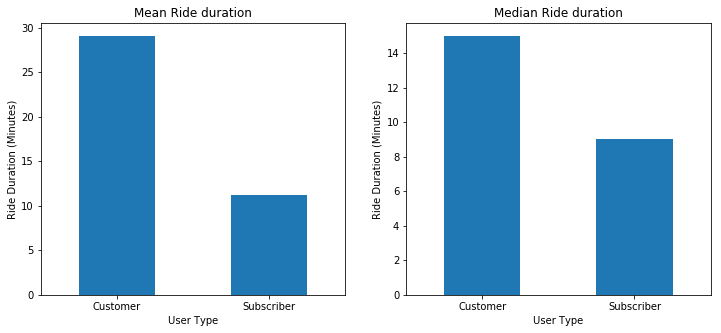

In [65]:
plt.figure(figsize=(12,5))

ax1 = plt.subplot(1, 2, 1)
df_bike_share_copy.groupby('user_type')['duration_min'].mean().plot(kind='bar')
plt.xticks(rotation=0)
subplot_label(ax1,'Mean Ride duration', 'User Type','Ride Duration (Minutes)')

ax2 = plt.subplot(1, 2, 2)
df_bike_share_copy.groupby('user_type')['duration_min'].median().plot(kind='bar')
plt.xticks(rotation=0)
subplot_label(ax2,'Median Ride duration', 'User Type','Ride Duration (Minutes)')

### Users overshooting the ride duration limit

* As a part of the subscription, Subscribers can use the bikes for unlimited number of 45 min rides. After the ride limit of 45 min, an extra 3\\$ is charged for every 15 min of the ride.
* Customers can ride the bikes for 30 min costing 3\\$. After the ride limit of 30 min, an extra 3\\$ is charged for every 15 min of the ride.

Looks like around 15% of the Customers use bikes for more than 30 min and they are not likely to find the 30 min ride duration limit and pricing strategy to be convenient. Around 82% of Subscribers ride for less than 15 min.



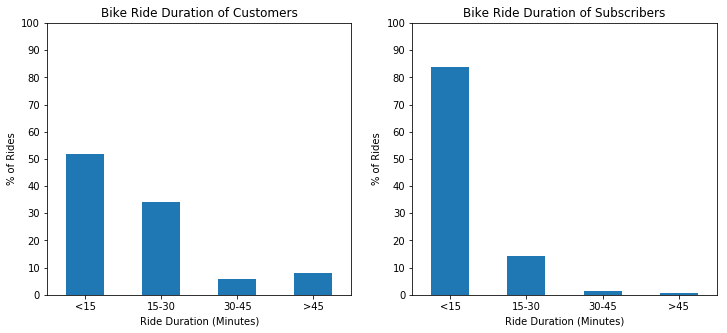

In [66]:
plt.figure(figsize=(12,5))

ax1 = plt.subplot(1, 2, 1)
(pd_duration_customer/pd_duration_customer.sum()).plot(kind='bar')
plt.xticks([0,1,2,3],['<15', '15-30', '30-45', '>45' ], rotation=0)
tick_ylocs = np.arange(0,110,10)
plt.yticks(tick_ylocs/100, tick_ylocs)
subplot_label(ax1,'Bike Ride Duration of Customers', 'Ride Duration (Minutes)','% of Rides')

ax2 = plt.subplot(1, 2, 2)
(pd_duration_subscriber/pd_duration_subscriber.sum()).plot(kind='bar')
plt.xticks([0,1,2,3],['<15', '15-30', '30-45', '>45' ], rotation=0)
tick_ylocs = np.arange(0,110,10)
plt.yticks(tick_ylocs/100, tick_ylocs)
subplot_label(ax2,'Bike Ride Duration of Subscribers', 'Ride Duration (Minutes)','% of Rides')

* Customers have a fixed price for the first 30 min of the ride and looks like around 15% of the customers use bikes for more than 30 min.
* Subscribers have a fixed price for the first 45 min of the ride and only a small %(1-2) of them use bikes for more than 45 min


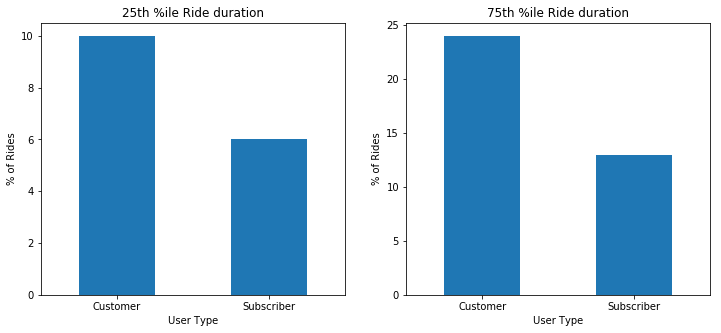

In [67]:
plt.figure(figsize=(12,5))

ax1 = plt.subplot(1, 2, 1)
df_bike_share_copy.groupby('user_type')['duration_min'].quantile(0.25).plot(kind='bar')
plt.xticks(rotation=0)
subplot_label(ax1,'25th %ile Ride duration', 'User Type','% of Rides')

ax2 = plt.subplot(1, 2, 2)
df_bike_share_copy.groupby('user_type')['duration_min'].quantile(0.75).plot(kind='bar')
plt.xticks(rotation=0)
subplot_label(ax2,'75th %ile Ride duration', 'User Type','% of Rides')

It can be seen from the above plots of ride duration summary statistics that many customers generally ride bikes longer than the subscribers




### Ride Duration across User Gender

(0, 25)

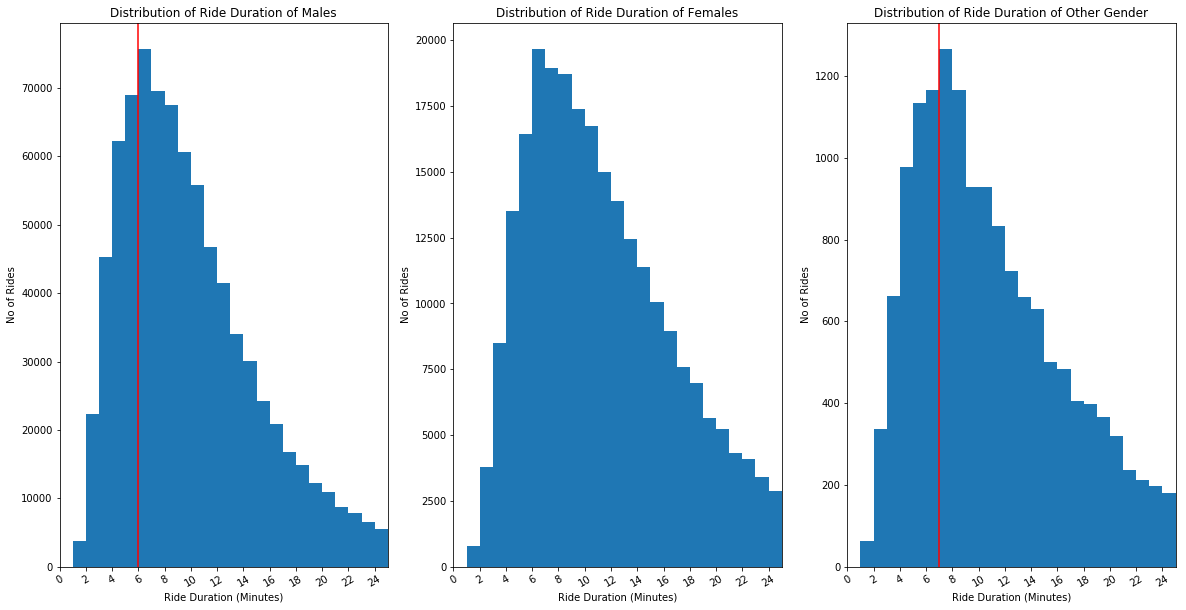

In [68]:
plt.figure(figsize=(20,10))

ax1 = plt.subplot(1, 3, 1)
bin_edges = np.arange(0,80,1)
plt.hist(data=df_bike_share_copy_male, x='duration_min', bins=bin_edges);
plt.xlim(0,35)
tick_xlocs = np.arange(0,36,2)
plt.xticks(tick_xlocs, tick_xlocs, rotation=30);
plt.axvline(df_bike_share_copy_male.loc[:,"duration_min"].mode()[0], color='red')
subplot_label(ax1,'Distribution of Ride Duration of Males', 'Ride Duration (Minutes)','No of Rides')
plt.xlim(0,25)

ax2 = plt.subplot(1, 3, 2)
bin_edges = np.arange(0,80,1)
plt.hist(data=df_bike_share_copy_female, x='duration_min', bins=bin_edges);
plt.xlim(0,35)
tick_xlocs = np.arange(0,36,2)
plt.xticks(tick_xlocs, tick_xlocs, rotation=30);
subplot_label(ax2,'Distribution of Ride Duration of Females', 'Ride Duration (Minutes)','No of Rides')
plt.xlim(0,25)

ax3 = plt.subplot(1, 3, 3)
bin_edges = np.arange(0,80,1)
plt.hist(data=df_bike_share_copy_other, x='duration_min', bins=bin_edges);
plt.xlim(0,35)
tick_xlocs = np.arange(0,36,2)
plt.xticks(tick_xlocs, tick_xlocs, rotation=30);
plt.axvline(df_bike_share_copy_other.loc[:,"duration_min"].mode()[0], color='red')
subplot_label(ax3,'Distribution of Ride Duration of Other Gender', 'Ride Duration (Minutes)','No of Rides')
plt.xlim(0,25)

Ride Duration of Male and Female users seem to peak around 6-7 min while that of Other Gender around 7-8 min

### User type vs User gender
* A plot on logarithmic scale shows that Males use the bike service more than Females and Other gender.

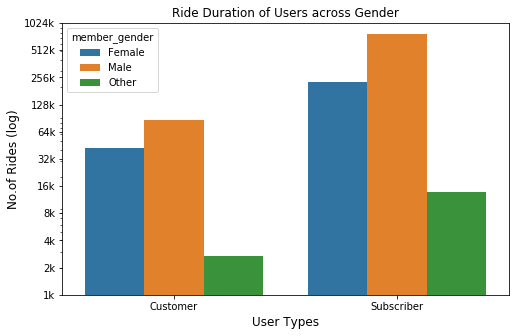

In [69]:
plt.figure(figsize=(8,5))

sb.countplot(data = df_bike_share_copy, x = 'user_type', hue = 'member_gender');
tick_ylocs = [1000,2000,4000,8000,16000,32000,64000,128000,256000,512000,1024000]
tick_ylocs_label = ['1k','2k','4k','8k','16k','32k','64k','128k','256k','512k','1024k']
plt.yscale('log', nonposy='clip')
plt.yticks(tick_ylocs, tick_ylocs_label);
plt.title('Ride Duration of Users across Gender')
plot_label('Ride Duration of Users across Gender', 'User Types', 'No.of Rides (log)')

### Distribution of User Age across User type

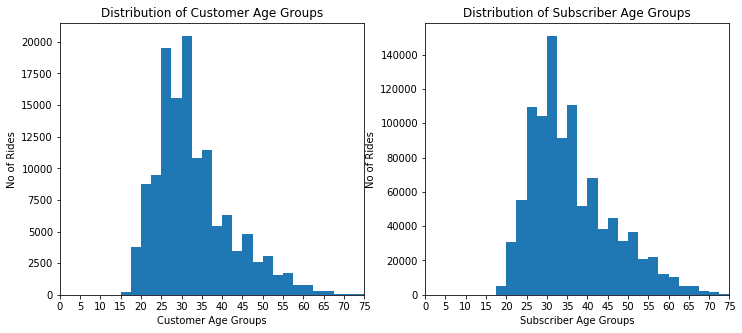

In [70]:
plt.figure(figsize=(12,5))

ax1 = plt.subplot(1, 2, 1)
bin_edges = np.arange(0,90,2.5)
plt.hist(data=df_bike_share_copy_customer, x='age', bins=bin_edges);
plt.xticks(bin_edges*2, (bin_edges*2).astype(int));
plt.xlim(0,75)
subplot_label(ax1,'Distribution of Customer Age Groups', 'Customer Age Groups','No of Rides')

ax2= plt.subplot(1, 2, 2)
bin_edges = np.arange(0,90,2.5)
plt.hist(data=df_bike_share_copy_subscriber, x='age', bins=bin_edges);
plt.xticks(bin_edges*2, (bin_edges*2).astype(int));
plt.xlim(0,75)
subplot_label(ax2,'Distribution of Subscriber Age Groups', 'Subscriber Age Groups','No of Rides')

Both Customers and Subscribers seem to have most number of users in 30 - 32.5 age bracket

In [71]:
month_order = [7, 8, 9,10,11,12,1,2,3,4,5,6]
base_color = sb.color_palette()[0]
customer_month_index = df_bike_share_copy_customer.groupby(df_bike_share_copy_customer['start_time'].dt.month)['start_time'].count().index
customer_month_values = df_bike_share_copy_customer.groupby(df_bike_share_copy_customer['start_time'].dt.month)['start_time'].count().values
subscriber_month_index = df_bike_share_copy_subscriber.groupby(df_bike_share_copy_subscriber['start_time'].dt.month)['start_time'].count().index
subscriber_month_values = df_bike_share_copy_subscriber.groupby(df_bike_share_copy_subscriber['start_time'].dt.month)['start_time'].count().values

### User rides across months

A plot of logarithmic scale shows that the bike rides were reduced in the month of Nov-Dec 2017 and there has been a steady increase in rides from Jan 2018.

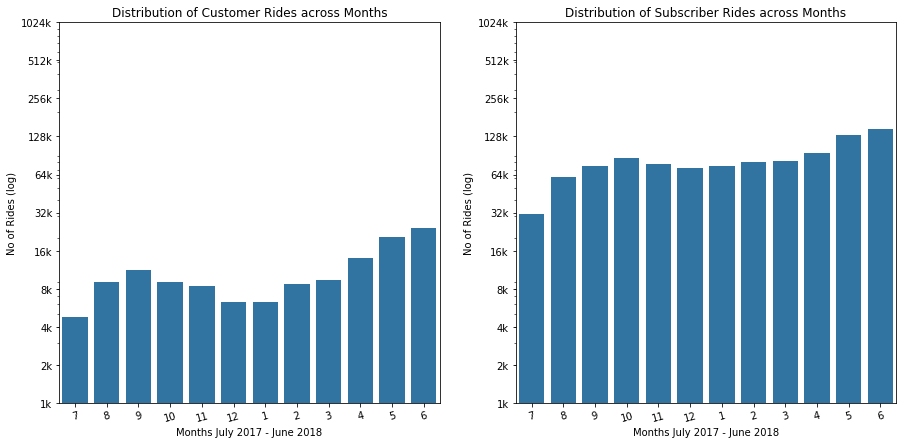

In [72]:
plt.figure(figsize=(15,7))

ax1 = plt.subplot(1, 2, 1)
sb.barplot(customer_month_index, customer_month_values, order=month_order, color = base_color)
plt.yscale('log', nonposy='clip')
tick_ylocs = [1000,2000,4000,8000,16000,32000,64000,128000,256000,512000,1024000]
tick_ylocs_label=['1k','2k','4k','8k','16k','32k','64k','128k','256k','512k','1024k']
plt.yticks(tick_ylocs, tick_ylocs_label);
plt.xticks(rotation=15);
subplot_label(ax1,'Distribution of Customer Rides across Months', 'Months July 2017 - June 2018','No of Rides (log)')

ax2 = plt.subplot(1, 2, 2)
sb.barplot(subscriber_month_index, subscriber_month_values, order=month_order, color = base_color)
plt.yscale('log', nonposy='clip')
tick_ylocs = [1000,2000,4000,8000,16000,32000,64000,128000,256000,512000,1024000]
plt.yticks(tick_ylocs, tick_ylocs_label);
plt.xticks(rotation=15);
subplot_label(ax2,'Distribution of Subscriber Rides across Months', 'Months July 2017 - June 2018','No of Rides (log)')

Bikes rides by customers took a downtrend from october and started rising in feb and bike rides by subscribers took a dip in the months of nov-dec

### User rides across Days of Week

* It can be seen that bike rides by Subscribers were more in number on weekdays and less in number on weekends suggesting that the Subscribers use bikes to commute to work.
* Customer rides were more in number towards the weekend suggesting bike ride usage for leisure. It is also interesting to note the Customer bike rides increasing as the week progresses.

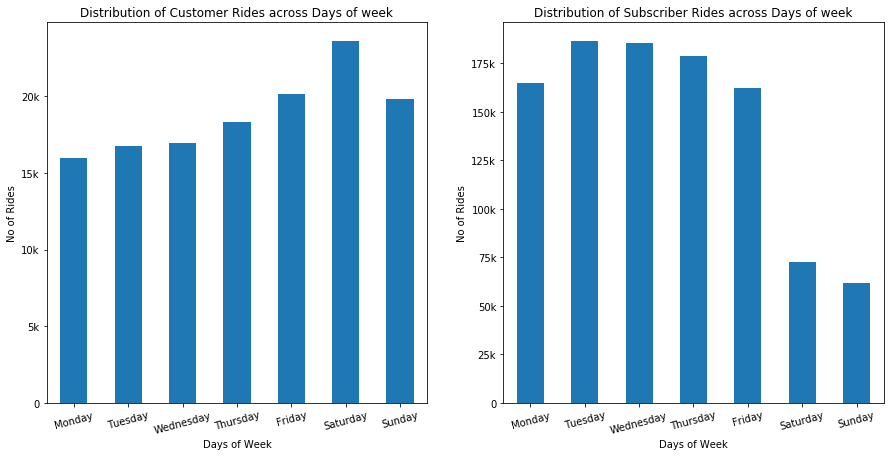

In [73]:
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(15,7))

ax1 = plt.subplot(1, 2, 1)
df_bike_share_copy_customer.groupby(df_bike_share_copy_customer['start_time'].dt.dayofweek)['start_time'].count().plot(kind='bar');
tick_ylocs = np.arange(0,25000,5000)
tick_ylocs_label = ['0', '5k', '10k', '15k', '20k', '25k']
plt.yticks(tick_ylocs, tick_ylocs_label);
plt.xticks([0,1,2,3,4,5,6], week_order, rotation=15);
subplot_label(ax1,'Distribution of Customer Rides across Days of week', 'Days of Week','No of Rides')

ax2 = plt.subplot(1, 2, 2)
df_bike_share_copy_subscriber.groupby(df_bike_share_copy_subscriber['start_time'].dt.dayofweek)['start_time'].count().plot(kind='bar');
plt.xticks([0,1,2,3,4,5,6], week_order, rotation=15);
tick_ylocs = np.arange(0,200000,25000)
tick_ylocs_label = ['0', '25k', '50k', '75k', '100k', '125k', '150k', '175k', '200k']
plt.yticks(tick_ylocs, tick_ylocs_label);
subplot_label(ax2,'Distribution of Subscriber Rides across Days of week', 'Days of Week','No of Rides')

The bike rides taken by customers have increased through the week and reaching a peak on Saturday while the bike rides by subscribers have decreased through the weekdays hitting the minimum on the weekends.
May be the visiting customers use bike shares for leisure/one off rides on weekends and looks like the subscribes mainly use bike rides to commute to work on weekdays

### Rides by Users through the day

* Subscriber rides peak at office commute time of 8-9 hours and 17-18 hours.
* Customer rides gradually increase as the day progresses and peaks in the evening.

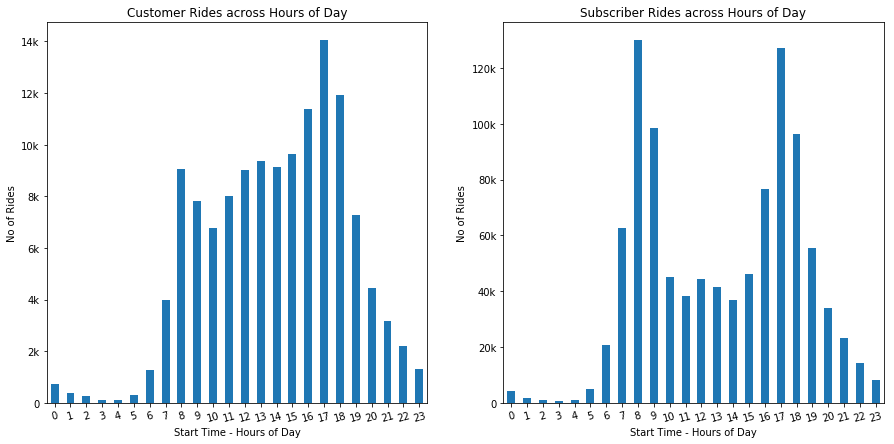

In [74]:
plt.figure(figsize=(15,7))

ax1 = plt.subplot(1, 2, 1)
df_bike_share_copy_customer.groupby(df_bike_share_copy['start_time'].dt.hour)['start_time'].count().plot(kind='bar');
plt.xticks(rotation=15)
tick_ylocs = np.arange(0,16000,2000)
tick_ylocs_label = ['0', '2k', '4k', '6k', '8k', '10k', '12k', '14k', '16k']
plt.yticks(tick_ylocs, tick_ylocs_label);
subplot_label(ax1,'Customer Rides across Hours of Day', 'Start Time - Hours of Day','No of Rides')

ax2 = plt.subplot(1, 2, 2)
df_bike_share_copy_subscriber.groupby(df_bike_share_copy['start_time'].dt.hour)['start_time'].count().plot(kind='bar');
plt.xticks(rotation=15)
tick_ylocs = np.arange(0,140000,20000)
tick_ylocs_label = ['0', '20k', '40k', '60k', '80k', '100k', '120k', '140k', '160k']
plt.yticks(tick_ylocs, tick_ylocs_label);
subplot_label(ax2,'Subscriber Rides across Hours of Day', 'Start Time - Hours of Day','No of Rides')

Looks the the subscribers have used the bike share service more at mornings and evenings suggesting commute to work while the customers's usage of bike share service seems to increase through the day and peak in the evening

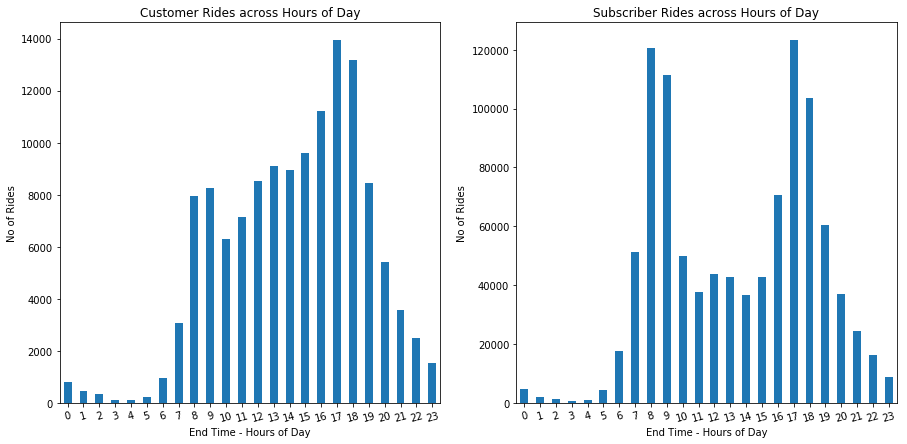

In [75]:
plt.figure(figsize=(15,7))

ax1 = plt.subplot(1, 2, 1)
df_bike_share_copy_customer.groupby(df_bike_share_copy['end_time'].dt.hour)['end_time'].count().plot(kind='bar');
plt.xticks(rotation=15)
subplot_label(ax1,'Customer Rides across Hours of Day', 'End Time - Hours of Day','No of Rides')

ax2 = plt.subplot(1, 2, 2)
df_bike_share_copy_subscriber.groupby(df_bike_share_copy['end_time'].dt.hour)['end_time'].count().plot(kind='bar');
plt.xticks(rotation=15)
subplot_label(ax2,'Subscriber Rides across Hours of Day', 'End Time - Hours of Day','No of Rides')

Not much difference between start and end hour distribution

### Rides by Users across locations

* Most of the Customer rides started and ended at 'The Embarcadero' and 'SF Ferry Building'.
* The highest Subscriber rides started and ended at 'SF Caltrain' and 'SF Caltrain Station 2'.

In [76]:
customer_location_count = df_bike_share_copy_customer['start_station_id'].value_counts()[:5]
subscriber_location_count = df_bike_share_copy_subscriber['start_station_id'].value_counts()[:5]

In [77]:
customer_end_location_count = df_bike_share_copy_customer['end_station_id'].value_counts()[:5]
subscriber_end_location_count = df_bike_share_copy_subscriber['end_station_id'].value_counts()[:5]

In [78]:
subscriber_location_count

30.0    25577
67.0    24592
58.0    23132
81.0    22953
15.0    21919
Name: start_station_id, dtype: int64

In [79]:
subscriber_end_location_count

30.0    34184
67.0    29835
15.0    26761
21.0    25852
81.0    22270
Name: end_station_id, dtype: int64

In [80]:
customer_location_count

6.0     4285
15.0    4274
3.0     2577
81.0    2183
5.0     2113
Name: start_station_id, dtype: int64

In [81]:
customer_end_location_count

6.0     5897
15.0    4342
3.0     2790
67.0    2524
30.0    2298
Name: end_station_id, dtype: int64

In [82]:
location_label = []
for i in range(5):
    print(df_bike_share[df_bike_share['start_station_id'] == float(customer_location_count.index[i])].start_station_name.unique()[0])

The Embarcadero at Sansome St
San Francisco Ferry Building (Harry Bridges Plaza)
Powell St BART Station (Market St at 4th St)
Berry St at 4th St
Powell St BART Station (Market St at 5th St)


In [83]:
customer_location_label = ['The Embarcadero', 'SF Ferry Building', 'BART Stn 4th St','Berry St', 'BART Stn 5th St',  ]

In [84]:
location_label = []
for i in range(5):
    print(df_bike_share[df_bike_share['start_station_id'] == float(subscriber_location_count.index[i])].start_station_name.unique()[0])

San Francisco Caltrain (Townsend St at 4th St)
San Francisco Caltrain Station 2  (Townsend St at 4th St)
Market St at 10th St
Berry St at 4th St
San Francisco Ferry Building (Harry Bridges Plaza)


In [85]:
subscriber_location_label = ['SF Caltrain', 'SF Caltrain Stn 2', 'Market St','Berry St', 'SF Ferry Building']

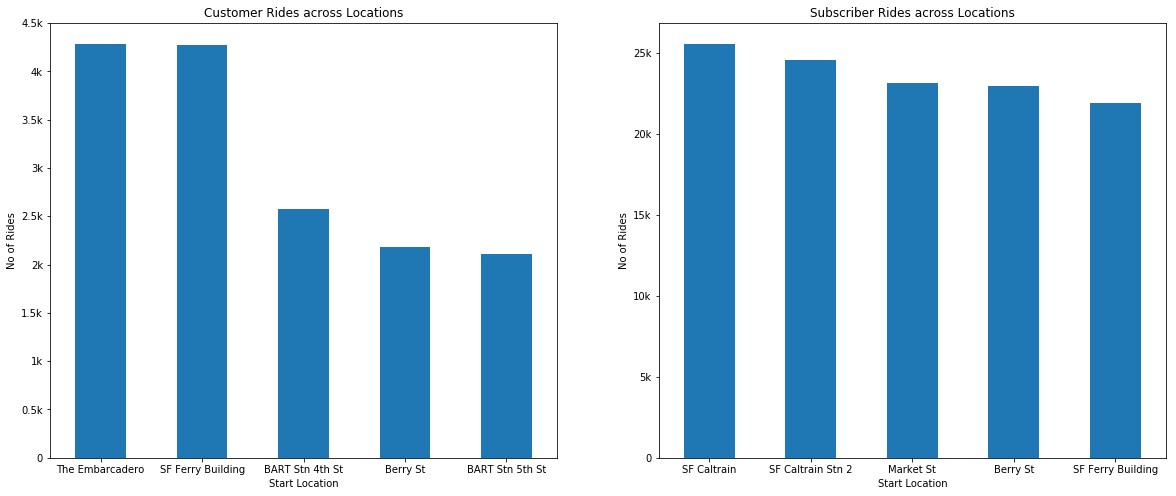

In [86]:
plt.figure(figsize=(20,8))

ax1 = plt.subplot(1,2,1)
df_bike_share_copy_customer['start_station_id'].value_counts()[:5].plot(kind='bar');
plt.xticks([0,1,2,3,4],customer_location_label,rotation=0);
tick_ylocs = np.arange(0,5000,500)
tick_ylocs_label = ['0', '0.5k', '1k', '1.5k', '2k', '2.5k', '3k', '3.5k', '4k', '4.5k', '5k']
plt.yticks(tick_ylocs, tick_ylocs_label);
subplot_label(ax1,'Customer Rides across Locations', 'Start Location','No of Rides')

ax2 = plt.subplot(1,2,2)
df_bike_share_copy_subscriber['start_station_id'].value_counts()[:5].plot(kind='bar');
plt.xticks([0,1,2,3,4],subscriber_location_label,rotation=0);
tick_ylocs = np.arange(0,30000,5000)
tick_ylocs_label = ['0', '5k', '10k', '15k', '20k', '25k', '30k']
plt.yticks(tick_ylocs, tick_ylocs_label);
subplot_label(ax2,'Subscriber Rides across Locations', 'Start Location','No of Rides')

### Multi Variate Exploration

In [87]:
pd.options.mode.chained_assignment = None

In [88]:
df_bike_share_copy_customer.loc[:,'day_of_week'] = df_bike_share_copy_customer['start_time'].dt.dayofweek.astype('str').copy()
df_bike_share_copy_customer.loc[:,'start_hour'] = df_bike_share_copy_customer['start_time'].dt.hour.astype('str').copy()
df_bike_share_copy_subscriber.loc[:,'day_of_week'] = df_bike_share_copy_subscriber['start_time'].dt.dayofweek.astype('str').copy()
df_bike_share_copy_subscriber.loc[:,'start_hour'] = df_bike_share_copy_subscriber['start_time'].dt.hour.astype('str').copy()

In [89]:
df_bike_share_copy.head()

,bike_id,duration_sec,end_station_id,end_time,member_birth_year,member_gender,start_station_id,start_time,user_type,duration_min,age
0,96,80110,43.0,2018-01-01 15:12:50.245,1987,Male,74.0,2017-12-31 16:57:39.654,Customer,1335,30
1,88,78800,96.0,2018-01-01 13:49:55.617,1965,Female,284.0,2017-12-31 15:56:34.842,Customer,1313,52
2,3167,43603,247.0,2018-01-01 02:29:57.571,1997,Female,239.0,2017-12-31 14:23:14.001,Subscriber,727,20
3,3539,4507,259.0,2018-01-01 01:04:35.619,1991,Female,259.0,2017-12-31 23:49:28.422,Customer,75,26
4,2311,2183,24.0,2018-01-01 00:29:18.743,1990,Male,67.0,2017-12-31 23:52:55.581,Subscriber,36,27


In [90]:
df_bike_share_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1144221 entries, 0 to 1213625
Data columns (total 11 columns):
bike_id              1144221 non-null object
duration_sec         1144221 non-null int64
end_station_id       1144221 non-null object
end_time             1144221 non-null datetime64[ns]
member_birth_year    1144221 non-null int64
member_gender        1144221 non-null category
start_station_id     1144221 non-null object
start_time           1144221 non-null datetime64[ns]
user_type            1144221 non-null category
duration_min         1144221 non-null int64
age                  1144221 non-null int64
dtypes: category(2), datetime64[ns](2), int64(4), object(3)
memory usage: 129.5+ MB


In [91]:
customer_week_count = []
for i in range(24):
    hour_count = []
    for j in range(7):
        hour_count.append(df_bike_share_copy_customer[(df_bike_share_copy_customer['start_hour'] == str(i)) & (df_bike_share_copy_customer['day_of_week'] == str(j))]['start_time'].count())
    customer_week_count.append(hour_count)    

In [92]:
subscriber_week_count = []
for i in range(24):
    hour_count = []
    for j in range(7):
        hour_count.append(df_bike_share_copy_subscriber[(df_bike_share_copy_subscriber['start_hour'] == str(i)) & (df_bike_share_copy_subscriber['day_of_week'] == str(j))]['start_time'].count())
    subscriber_week_count.append(hour_count) 

### Ride Duration across Days of Week

We can see a high Customer usage from noon to evening on weekends and a high Subscriber usage during work commute hours on the weekdays.

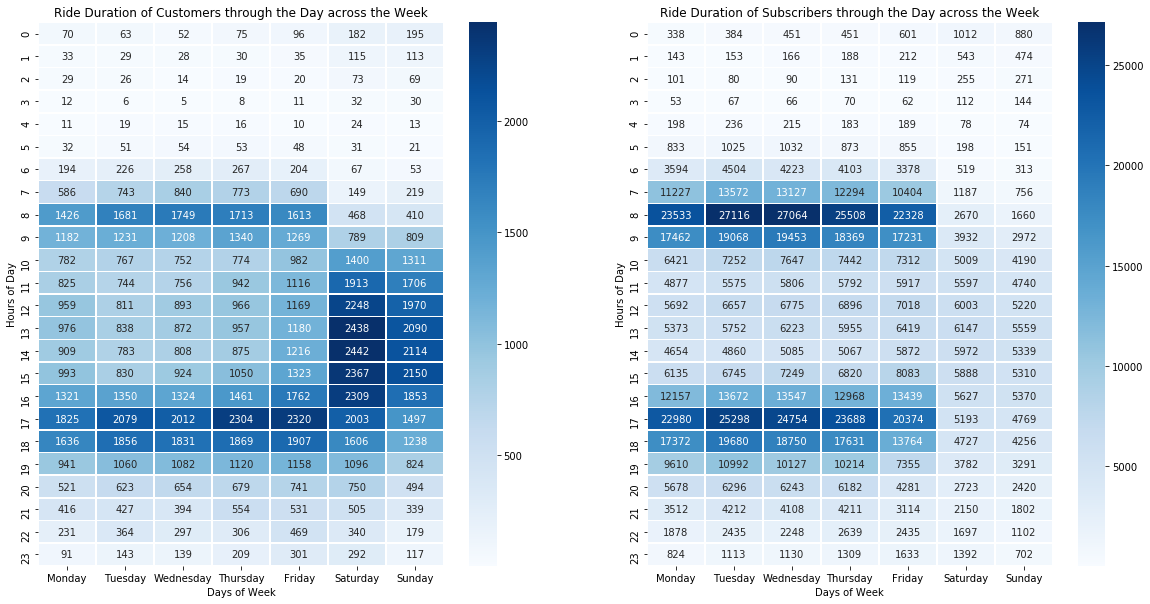

In [93]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)    
ax1 = sb.heatmap(customer_week_count, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
ax1.set_xticklabels(week_order)
subplot_label(ax1,'Ride Duration of Customers through the Day across the Week', 'Days of Week','Hours of Day')

plt.subplot(1,2,2)
ax2 = sb.heatmap(subscriber_week_count, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
ax2.set_xticklabels(week_order)
subplot_label(ax2,'Ride Duration of Subscribers through the Day across the Week', 'Days of Week','Hours of Day')

* It can be seen that the customers use bike share more in the office commute hours on weekdays and in noon to evening on weekends
* Much of Subscribers use bike share service in the office commute hours on weekdays

### Conclusion

* The Subscribers use the bike service to commute to work and majority of their rides lasted less than 30 min.
* Customers use the Bike Service for leisure and they prefer to take the bikes out on long rides. 
* The Subscribers who generally ride for a shorter duration have a long ride limit of 45 min and the Customers who prefer to go on long rides are given a shorter ride limit of 30 min. 
* The Customers are not likely to find the ride limit and pricing to be convenient. A Separate long ride plan for Customerss would make a better bike sharing experience for them.